In [8]:
import pandas as pd 
import numpy as np
from sklearn.utils import resample

def bootstrap(data):
    # Simulating a dataset with 1000 observations
    np.random.seed(42) # for reproducibility

    # Initialize an empty list to store the bootstrapped medians
    bootstrap_medians = []

    # Generate 1000 bootstrap samples and compute their medians
    for _ in range(1000):
        sample = resample(data)
        bootstrap_medians.append(sample.median())

    # Compute and print the bootstrap statistics
    print(f'Original: {data.median()}')
    print(f'Bias: {np.mean(bootstrap_medians) - data.median()}')
    print(f'Std. Error: {np.std(bootstrap_medians)}')

In [9]:
bootstrap(pd.Series(np.random.randn(1000)))

Original: 0.011424346062402784
Bias: 0.0015528678902018908
Std. Error: 0.038766651928454604


In [10]:
Boston = pd.read_csv('Boston.csv')
Boston.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [11]:
bootstrap(Boston[['crim']])

Original: crim    0.25651
dtype: float64
Bias: crim    0.006445
dtype: float64
Std. Error: 0.037084199030392645


In [13]:
bootstrap(Boston[['age']])

Original: age    77.5
dtype: float64
Bias: age    0.02365
dtype: float64
Std. Error: 2.435814684556278


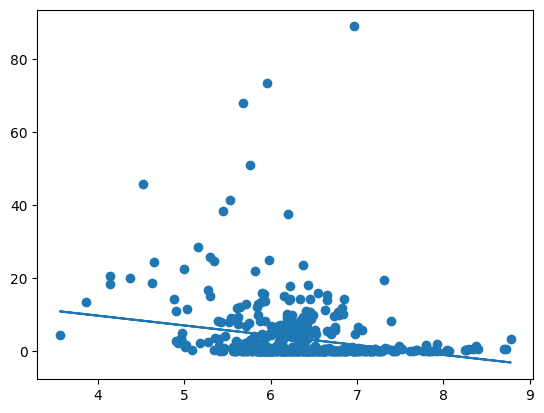

In [22]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
X = Boston[['rm']]
y = Boston[['crim']]

lm = LinearRegression()
model = lm.fit(X, y)
pr = model.predict(X)

plt.scatter(X, y)
plt.plot(X, pr)

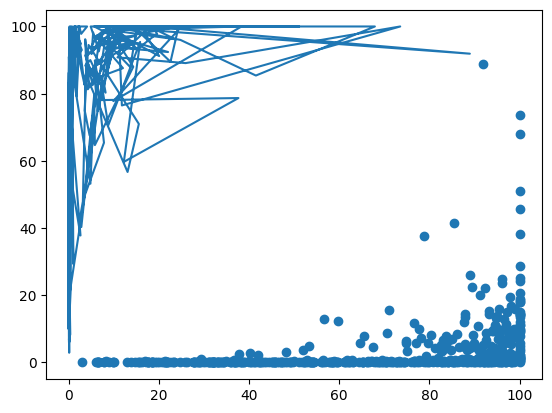

In [18]:
plt.scatter(X, y)
plt.plot(y, X)